# Algebra liniowa z zastosowaniami 1
## Ćwiczenia w sali komputerowej nr 5
Uzupełnij swoje dane i sprawdź czy wyświetlają się poprawnie:

In [40]:
IMIE_NAZWISKO = "Daniel Stodulski"

print(IMIE_NAZWISKO)

Daniel Stodulski


Standardowo zaczniemy od wczytania biblioteki ```numpy```

In [41]:
import numpy as np

### Jak mierzyć podobieństwo dwóch wektorów z $\mathbb{R}^n$?

#### Iloczyn skalarny jako ,,miara" podobieństwa wektorów

Do określania pewnych zależności pomiędzy dwoma wektorami $x, y \in \mathbb{R}^n$ może służyć funkcja, która została już wspomniana na poprzednich zajęciach, nazywana **iloczynem skalarnym** (`standardowym iloczynem skalarnym`, po ang. `dot product`) zdefiniowana następująco

$$ x\cdot y = x^Ty=
\left [\begin{array}{rrrr}
x_1&x_2&\dots&x_n
\end{array}
\right ] \cdot
\left [\begin{array}{r}
y_1\\
y_2\\
\vdots\\
y_n
\end{array}
\right ]
=x_1y_1+x_2y_2+\dots +x_ny_n
$$


Jest ona przykładem funkcji zdefiniowanej w sposób aksjomatyczny nazywanej po polsku również iloczynem skalarnym, w języku angielskim jest jednak określana jako `inner product`.

**Definicja**
Niech $u, v$ i $w$ będą wektorami przestrzeni liniowej $V$ nad ciałem $K$ oraz $\alpha \in K.$ Odwzorowanie
$$
\langle \cdot,\cdot \rangle \colon V \times V \rightarrow K
$$
spełniające warunki
1. $\langle u,v \rangle=\langle v,u \rangle$
2. $\langle u+v,w \rangle=\langle u,w \rangle + \langle v,w \rangle$
3. $\langle \alpha u,v \rangle =\alpha\langle u,v \rangle = \langle u,\alpha v \rangle$
4. $\langle u,u \rangle \geq 0$ oraz $ \alpha u,u \rangle = 0 \iff u = \theta$
   
nazywamy `iloczynem skalarnym.`

Standardowy iloczyn skalarny spełnia powyższe aksjomaty.

**UWAGA** Oznaczenie $\langle x,y \rangle$ będzie dotyczyło dowolnej funkcji spełniającej warunki powyższej definicji, natomiast przez $x\cdot y$ będziemy oznaczali tylko standardowy iloczyn skalarny zdefiniowany w przestrzeni $\mathbb{R}^n$ i będziemy nazywali go iloczynem skalarnym. 

#### Porównywanie sekwencji dźwięków

Załóżmy, że chcesz sprawdzić, czy pewien fragment muzyki należy do danego nagrania. 

Matematycznie, sekwencja dźwięków (fragment muzyki), to ciągła funcja czasu. Wartością tej funkcji jest [amplituda](https://pl.wikipedia.org/wiki/Amplituda), która oscyluje pomiędzy pewnymi skrajnymi położeniami zależnymi od głośności dźwięku.
W komputerze sekwencja dźwięków jest reprezentowana jako ciąg liczb, wartości funkcji ciągłej odczytywanych (ang. *sampled*) w stałych odstępach czasu.

Zaczniemy od określenia jak sprawdzić podobieństwo różnych fragmentów o tej samej długości.

Załóżmy, że mamy trzy sekwencje dźwięków reprezentowane przez wektory
$$
x = 
\left [\begin{array}{r}
5\\
-6\\
9\\
-9\\
-5\\
5\\
-8\\
-5\\
9\\
-9
\end{array}
\right ],\quad
y = 
\left [\begin{array}{r}
6\\
-5\\
10\\
-8\\
-4\\
6\\
-7\\
-4\\
10\\
-8
\end{array}
\right ], \quad
z = 
\left [\begin{array}{r}
3\\
-4\\
7\\
-7\\
-3\\
3\\
-6\\
-3\\
7\\
-7
\end{array}
\right ].
$$

Im większe jest podobieństwo tych fragmentów do siebie nawzajem, tym większy jest ich iloczyn skalarny (wyjaśnimy to za chwilę). W rozważanym przypadku mamy $x\cdot y = 510,$ $x\cdot z = 384,$ $y\cdot z = 374.$ 

Zauważmy, że wartości $y$ to $x,$ do którego dodano wektor jedynek, natomiast elementy w $z$ zostały zaburzone względem $x$ o $2$ (na minus albo na plus). Zatem fragmenty $x$ i $y$ są do siebie najbardziej podobne.

Ten sposób porówywania sekwencji dźwięków sprawdzi się nawet, jeżeli będą różnice w głośności dźwięków, niestety nie sprawdzi się w przypadku zmian (nawet niewielkich) w wysokości dźwięków lub w tempie.

Załóżmy jednak, że mamy dwa fragmenty audio (dłuższy i krótszy) bez zmian wysokości dźwięków i tempa. 
Niech dłuższy fragment $x$ składa się z piętnastu próbek (wektor o $15$ elementach), a krótszy $y$ z $7$ próbek.

$$
x = 
\left [\begin{array}{r}
-4\\
10\\
-8\\
5\\
-6\\
9\\
-9\\
-5\\
5\\
-8\\
-5\\
9\\
-9\\
0\\
-1
\end{array}
\right ],\quad
y = 
\left [\begin{array}{r}
5\\
-6\\
10\\
-8\\
-5\\
5\\
-7
\end{array}
\right ].
$$

Chcąc określić, który fragment $x$ jest najbardziej podobny do $y$ należy policzyć iloczyny skalarne podwektorów wektora $x$ składających się z $7$ (= liczbie elementów wektora $y$) kolejnych elementów  wektora $x$ zaczynając od pierwszego elementu wektora $x$. Mamy zatem $9=15-7+1$ możliwych pozycji startowych dla podwektorów

1. $
\left [\begin{array}{r|r|r|r|r|r|r|r|r|r|r|r|r|r|r}
-4&10&-8&\ 5&-6&\ 9&-9&-5&\ 5&-8&-5&\ 9&-9&\ 0&-1\\
\hline
\ 5&-6&10&-8&-5&\ 5&-7&&&&&&&&
\end{array}
\right ]
$
2. $
\left [\begin{array}{r|r|r|r|r|r|r|r|r|r|r|r|r|r|r}
-4&10&-8&\ 5&-6&\ 9&-9&-5&\ 5&-8&-5&\ 9&-9&\ 0&-1\\
\hline
&\ 5&-6&10&-8&-5&\ 5&-7&&&&&&&
\end{array}
\right ]
$
3. $
\left [\begin{array}{r|r|r|r|r|r|r|r|r|r|r|r|r|r|r}
-4&10&-8&\ 5&-6&\ 9&-9&-5&\ 5&-8&-5&\ 9&-9&\ 0&-1\\
\hline
&&\ 5&-6&10&-8&-5&\ 5&-7&&&&&&
\end{array}
\right ]
$
4. $
\left [\begin{array}{r|r|r|r|r|r|r|r|r|r|r|r|r|r|r}
-4&10&-8&\ 5&-6&\ 9&-9&-5&\ 5&-8&-5&\ 9&-9&\ 0&-1\\
\hline
&&&\ 5&-6&10&-8&-5&\ 5&-7&&&&&
\end{array}
\right ]
$
5. $
\left [\begin{array}{r|r|r|r|r|r|r|r|r|r|r|r|r|r|r}
-4&10&-8&\ 5&-6&\ 9&-9&-5&\ 5&-8&-5&\ 9&-9&\ 0&-1\\
\hline
&&&&\ 5&-6&10&-8&-5&\ 5&-7&&&&
\end{array}
\right ]
$
6. $
\left [\begin{array}{r|r|r|r|r|r|r|r|r|r|r|r|r|r|r}
-4&10&-8&\ 5&-6&\ 9&-9&-5&\ 5&-8&-5&\ 9&-9&\ 0&-1\\
\hline
&&&&&\ 5&-6&10&-8&-5&\ 5&-7&&&
\end{array}
\right ]
$
7. $
\left [\begin{array}{r|r|r|r|r|r|r|r|r|r|r|r|r|r|r}
-4&10&-8&\ 5&-6&\ 9&-9&-5&\ 5&-8&-5&\ 9&-9&\ 0&-1\\
\hline
&&&&&&\ 5&-6&10&-8&-5&\ 5&-7&&
\end{array}
\right ]
$
8. $
\left [\begin{array}{r|r|r|r|r|r|r|r|r|r|r|r|r|r|r}
-4&10&-8&\ 5&-6&\ 9&-9&-5&\ 5&-8&-5&\ 9&-9&\ 0&-1\\
\hline
&&&&&&&\ 5&-6&10&-8&-5&\ 5&-7&
\end{array}
\right ]
$
9. $
\left [\begin{array}{r|r|r|r|r|r|r|r|r|r|r|r|r|r|r}
-4&10&-8&\ 5&-6&\ 9&-9&-5&\ 5&-8&-5&\ 9&-9&\ 0&-1\\
\hline
&&&&&&&&\ 5&-6&10&-8&-5&\ 5&-7
\end{array}
\right ]
$


Największy iloczyn skalarny spośrób przypadków $1-9$ wskazuje na największe podobieństwo obu porównywanych fragmentów audio.

**UWAGA** Niestety metoda ta nie sprawdza się np. w przypadku wektorów o wszystkich elementach mających te same znaki, np. $x = \left [\begin{array}{rrrrr}1&2&3&4&5\end{array}\right ]^T$ i $y = \left [\begin{array}{rrr}1&2&3\end{array}\right ]^T.$ Największy iloczyn skalarny będzie dla wektora $y$ i podwektora $\left [\begin{array}{rrr}3&4&5\end{array}\right ]^T$ wektora $x.$

Jednakże w ogólnym przypadku można wykorzystać iloczyn skalarny do określania podobieństwa wektorów.

##### **Zadanie 1** (2 pkt.)

Napisz funkcję `sample_similarity()` określającą za pomocą iloczynu skalarnego, do którego fragmentu nagrania (dłuższej sekwencji dźwięków) najbardziej podobny jest klip audio (krótsza sekwencja dźwięków).

Danymi wejściowymi mają być dwa wektory o elementach rzeczysistych: $x$  - nagranie, $y$ - klip audio.

Jako wynik mają być zwrócone:
1. wektor, którego $i-$ty element będzie iloczynem skalarnym klipu i podwektora wektora $x$ zaczynającego się od pozycji $i-$tej tego wektora (jednak nie wykraczający poza zakres wektora nagrania)
2. wektor będący pierwszym podwektorem wektora nagrania najbardziej przypominającym badany klip. 

W przypadku podania klipu dłuższego od nagrania, należy wektory zamienić rolami.

In [42]:
def sample_similarity(x, y):
    
    # UMIEŚĆ SWÓJ KOD TUTAJ
    nx = len(x)
    ny = len(y)
    if(nx > ny):
        il = []
        best = 0
        for i in range(0, nx - ny + 1):
            il.append(y.T@x[i:i+ny])
            if il[best] < il[i]:
                best = i
        return np.array(il), x[best:best+ny]
    else:
        il = []
        best = 0
        for i in range(0, ny - nx + 1):
            il.append(x.T@y[i:i+nx])
            if il[best] < il[i]:
                best = i
        return np.array(il), y[best:best+nx]

x = np.array([-4, 10, -8, 5, -6, 9, -9, -5, 5, -8, -5, 9, -9, 0, -1])
y = np.array([5, -6, 10, -8, -5, 5, -7])

sim_idx, subsample = sample_similarity(x, y)
print(sim_idx)
print(subsample)

[ -62  141 -217  329 -164  -39  232 -185    3]
[ 5 -6  9 -9 -5  5 -8]


Przykładowy przypadek testowy:

```python
x = np.array([-4, 10, -8, 5, -6, 9, -9, -5, 5, -8, -5, 9, -9, 0, -1])
y = np.array([5, -6, 10, -8, -5, 5, -7])

sim_idx, subsample = sample_similarity(x, y)
print(sim_idx)
print(subsample)
```

Oczekiwany wynik:

```plaintext
[ -62  141 -217  329 -164  -39  232 -185    3]
[ 5 -6  9 -9 -5  5 -8]
```

#### Wykrywanie błędu w transmisji danych

Iloczyn skalarny może być wykorzystywany w wykrywaniu błędów w transmisji lub zapisie danych. Jedną z najbardziej podstawowych metod wykrywania błędu jest [kontrola parzystości](https://pl.wikipedia.org/wiki/Kontrola_parzysto%C5%9Bci). Należy wówczas dla $n$ bitowej sekwencji obliczyć dodatkowy bit (`bit parzystości`) jako parzystość skwencji i dołączyć go do przesyłanej sekwencji. My jednak zajmiemy się metodą opartą o iloczyn skalarny.

Rozważmy przypadek logowania się `użytkowniczki/ka` do `komputera` przez `niezabezpieczoną sieć` ze schematem uwierzytelniania polegającym na  podaniu hasła. Skoro sieć jest niezabezpieczona, to ktoś (nazwijmy tę osobę `osobą podsłuchującą`) może poznać hasło logowania danej/ego użytkowniczki/ka do konkretnego komputera.

W takim przypadku lepszym sposobem uwierzytelniania wydaje się schemat ,,wyzwanie-dopowiedź'' polegający na tym, że w przypadku chęci zalogowania się użytkowniczki/ka do komputera, komputer zadaje  serię pytań, na które prawidłowe odpowiedzi może udzielić tylko osoba znająca hasło. Jeżeli wszystkie odpowiedzi są prawidłowe, komputer uznaje, że osoba chcąca się zalogować, zna hasło.

Proces ten można opisać w języku matematyki jako obliczanie iloczynu skalarnego wektorów o elementach z ciała $\mathbb{Z}_2.$
Niech hasło $x$ będzie $n$ elementowym ciągiem bitów. W $i-$tym pytaniu komputer wysyła $n$ elementowy wektor $ai$ (`i-te wyzwanie`), a osoba chcąca się zalogować odsyła pojedynczy bit $\beta_i,$ który jest iloczynem skalarnym wektora $ai$ oraz hasła. Jeżeli odpowiedzi na wszystkie pytania komputera są prawidłowe (komputer porównuje udzielone odpowiedzi ze swoimi obliczeniami, na podstawie zapisanego hasła użytkownika), komputer uznaje, że użytkownik/czka zna hasło. 

**Przykład** Niech hasło $x = [1,0,1,1,1].$ 
1. Komputer wysyła $a1 = [0,1,0,1,1].$ Iloczyn skalarny $x\cdot a1$ w $\mathbb{Z}_2$ wynosi $0+0+0+1+1=0.$
2. Komputer wysyła $a2 = [1,1,1,1,0].$ Iloczyn skalarny $x\cdot a2$ w $\mathbb{Z}_2$ wynosi $1+0+1+1+0=1.$

##### **Zadanie 2** (2 pkt.)

Napisz funkcję `trial()`, która dla zadanego $n$ elementowego wektora zer i jedynek $x$ będzie generowała taki $n$ elementowy wektor zer i jedynek $y,$ żeby ich iloczyn skalarny był zadanej wartości $0$ lub $1.$ 

Dane wejściowe to wektor $x$ i skalar $b$ przyjmujący wartości $0$ lub $1.$

Jako wynik należy zwróć wygenerowany wektor $y.$  Jeżeli danymi wejściowymi będą: zerowy wektor $x$ oraz $b=1,$ to funkcja ma zwracać ,,Niedozwolona kombinacja".

In [43]:
def trial(x, b):
    
    # UMIEŚĆ SWÓJ KOD TUTAJ
    if sum(x) == 0 and b == 1:
        print("Niedozwolona kombinacja")
        exit()
    y = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] == 0:
            y[i] = 1
        else:
            y[i] = 0
    if b == 1 and sum(x) % 2 == 0:
        for i in range(len(x)):
            if y[i] == 0:
                y[i] = 1
                break

    return np.array(y, dtype=int)
               
x = np.array([0, 0, 1, 0, 1, 1, 1, 0])
b = 1
print(trial(x, b))

[1 1 1 1 0 0 0 1]


Przykładowe przypadki testowe, które powinien przejść Twój kod:

Przypadek testowy 1:

```python
x = np.array([0, 0, 1, 0, 1, 1, 1, 0])
b = 1
print(trial(x, b))
```

Oczekiwany wynik:

```plaintext
[1 1 1 1 0 0 0 1]
```

Przypadek testowy 2:

```python
x = np.array([0, 0, 0])
b = 1
print(trial(x, b))
```

Oczekiwany wynik:

```plaintext
Niedozwolona kombinacja
```

**UWAGA** Metoda wyzwanie-odpowiedź nie jest wystarczająco bezpieczna dla użytkowniczki/ka. Jeżeli osoba podsłuchująca **zna zagadnienia algebry liniowej**, a w szczególności własności iloczynu skalarnego i pojęcie kombinacji liniowej wektorów, to może wygenerować odpowiedź na podstawie wystarczająco dużego zbioru obserwacji.

Mianowicie, jeżeli osoba podsłuchująca zaobserwowała setki wyzwań: $a1, a2, \dots, am,$ $m>>100,$ oraz tyle samo odpowiedzi: $\beta_1, \beta_2, \dots, \beta_m$ i chce odpowiedzieć na kolejne pytanie, powiedzmy $a,$ to musi znaleźć podzbiór zbioru wyzwań, którego suma jest równa $a.$ Niech $a=a1+a2+\cdots+ak$ wówczas prawidłowa odpowiedź to $\beta = \beta_1+\beta_2+\cdots+\beta_k.$

Wynika to z następujące własności iloczynu skalarnego: jeżeli $u, v$ i $w$ są wektorami z $\mathbb{R}^n,$ $c\in \mathbb{R},$ to $$u\cdot (v+w) = u\cdot v + u\cdot w.$$ 

Zatem 
$$
a\cdot x = (a1+a2+\cdots+ak)\cdot x = a1\cdot x +a2\cdot x + \cdots + ak\cdot x = 
\beta_1+\beta_2+\cdots+\beta_k = \beta.
$$

**Przykład**
Skorzystajmy z poprzedniego przykładu i niech $a = a1+a2 = [0,1,0,1,1]+[1,1,1,1,0] = [1,0,1,0,1] $ (wykonywane jest dodawanie modulo $2$ elementów obydwu wektorów o tych samych indeksach). Wówczas prawidłowa odpowiedź to $\beta = \beta_1+\beta_2=0+1=1.$

Obliczmy teraz iloczyn skalarny $a\cdot x = [1,0,1,0,1] \cdot [1,0,1,1,1] = 1+0+1+0+1=1.$


##### **Zadanie 3** (2 pkt.)

Napisz funkcję `lin_comb()`, która dla zadanego $m$ elementowego zbioru $S = \{a1, a2, \dots, am\}$ wektorów z $\mathbb{Z}^n_2$ sprawdzi, czy podany wektor $x$ można przedstawić jako kombinację liniową wektorów z $S.$ 

Danymi wejściowymi mają być: wektor $x$ oraz lista (zbiór) $S.$

Jako wynik zwróć podzbiór wektorów zbioru $S,$ których suma $=x.$ Jeżeli nie ma takiego podzbioru zwróć ,,Brak kombinacji liniowej''.

**UWAGA** W związku z tym, że jedną z możliwości rozwiązania tego zadania jest metoda [brute force](https://pl.wikipedia.org/wiki/Atak_brute_force) oparta o [zbiór potęgowy](https://pl.wikipedia.org/wiki/Zbi%C3%B3r_pot%C4%99gowy), to ogranicz zbiór $S$ maksymalnie do $10$ elementów. W przypadku podania większej liczby wektorów zwróć wyjątek ,,Za duży zbiór S".

Do generowania zbioru potęgowego można wykorzystać poniższą funkcję `powerset()`.

In [44]:
from itertools import chain, combinations

# Generuje zbiór (sekwencję) wszystkich pozbiorów danej kolekcji, czyli zbiór potęgowy.
# Wynik zawiera również zbiór pusty.
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [45]:
def lin_comb(vec_list, x):
    
    # UMIEŚĆ SWÓJ KOD TUTAJ
    if(len(vec_list) >= 10):
        print("Za duży zbiór S")
        exit()

    p = powerset(vec_list)
    t = []
    for i in p:
        s = sum(i, start=np.zeros_like(x)) % 2
        if (np.array_equal(s, x % 2)):
            t.append(i)
    if len(t) == 0:
        print("Brak kombinacji liniowej")
        exit()
    return t[0]

S = [np.array([0, 1, 0]), np.array([1, 0, 0]), np.array([0, 0, 1])]
x = np.array([1, 1, 1])

print(lin_comb(S, x))

(array([0, 1, 0]), array([1, 0, 0]), array([0, 0, 1]))


Przypadek testowy 1:

```python
S = [np.array([0, 1, 0]), np.array([1, 0, 0]), np.array([0, 0, 1])]
x = np.array([1, 1, 1])

print(lin_comb(S, x))
```

Oczekiwany wynik:

```plaintext
(array([0, 1, 0]), array([1, 0, 0]), array([0, 0, 1]))
```

Przypadek testowy 2:

```python
S = [np.array([0, 1, 0]), np.array([1, 0, 0])]
x = np.array([1, 1, 1])

print(lin_comb(S, x))
```

Oczekiwany wynik:

```plaintext
Brak kombinacji liniowej
```

Przypadek testowy 3:

```python
S = [np.array([0, 1, 0]), np.array([1, 0, 0]), np.array([0, 0, 1]), np.array([0, 1, 0]),
     np.array([1, 0, 0]), np.array([0, 0, 1]), np.array([0, 1, 0]), np.array([1, 0, 0]),
     np.array([0, 0, 1]), np.array([0, 1, 0]), np.array([1, 0, 0])]
x = np.array([1, 1, 1])

print(lin_comb(S, x))
```

Oczekiwany wynik:

```plaintext
Za duży zbiór S
```

**UWAGA** Jeżeli zbiór zaobserwowanych wyzwań `rozpina przestrzeń` $\mathbb{Z}^n_2,$ to osoba podsłuchująca jest w stanie odpowiedzieć na każde pytanie zadane przez komputer.

#### Kąt między wektorami

Przestrzeń liniową z iloczynem skalarnym nazywamy przestrzenią euklidesową, a w przestrzeni euklidesowej można wprowadzić pojęcie kąta $\psi$ między niezerowymi wektorami $x$ i $y$
$$
\cos(\psi) = \frac{|  x\cdot y |}{\sqrt{|x\cdot x|}\sqrt{|y\cdot y|}}
$$
(patrzy wykład.)

Ważną rolę w rozwiązwyaniu zagadnień algebry liniowej pełnią `wektory ortogonalne` (w $\mathbb{R}^2$ nazywane prostopadłymi). Wektory $x, y \in \mathbb{R}^n$ nazywamy ortogonalnymi, jeżeli iloczyn skalarny $x \cdot y =0.$ 

`Zbiór` wektorów $x1, x2, \dots, x_m$ nazywamy `ortogonalnym`, jeżeli $x_i \cdot x_j = 0$ dla $i, j = 1, 2, \dots, m,$ $i\neq j$ oraz $x_i \cdot x_i \neq 0.$

W dalszej części kursu będą przedstawione zagadnienia, w których wykorzystywane jest pojęcie ortogonalności, teraz jednak skupiamy się tylko na iloczynie skalarnym i kącie prostym pomiędzy wektorami.

##### **Zadanie 4** (2 pkt.)

Napisz funkcję `orthodagonal_set()`, która bada, czy zadany zbiór $S$ wektorów jest ortogonalny. 

Danymi wejściowymi mają być wektory rzeczywiste z przestrzeni $\mathbb{R}^n.$ 

Jako wynik ma być zwrócona informacja ,,Zbiór ortogonalny", jeżeli wszystkie podane wektory są wzajemnie ortogonalne, w przeciwnym przypadku ma być zwrócony ,,Nieortogonalny zbiór".

In [46]:
def orthogonal_set(vectors):
    
    # UMIEŚĆ SWÓJ KOD TUTAJ
    for i in range(len(S)):
        for j in range(i + 1, len(S)):
            dot_product = np.dot(S[i], S[j])
            if dot_product != 0:
                return "Nieortogonalny zbiór"
    return "Zbiór ortogonalny"

S = [np.array([0, 0, 1]), np.array([0, 1, 0]), np.array([1, 0, 0])]
print(orthogonal_set(S))

Zbiór ortogonalny


Przypadek testowy 1:

```python
S = [np.array([0, 0, 1]), np.array([0, 1, 0]), np.array([1, 0, 0])]
print(orthogonal_set(S))
```

Oczekiwany wynik:

```plaintext
Zbiór ortogonalny
```

Przypadek testowy 2:

```python
S = [np.array([0, 0, 1]), np.array([0, 1, 0]), np.array([0, 2, -3])]
print(orthogonal_set(S))
```

Oczekiwany wynik:

```plaintext
Nieortogonalny zbiór
```

**Uwaga** Wróćmy jeszcze do zadania pierwszego i zagadnienia badania podobieństwa dźwięków. Ze wzoru na kosinus kąta między wektorami o ustalonej długości  
$$
\cos(\psi) = \frac{|  x\cdot y |}{\sqrt{|x\cdot x|}\sqrt{|y\cdot y|}}
$$
wynika, że kosinus tego kąta jest największy, gdy iloczyn skalarny jest największy. Kosinus jest największy, gdy kąt między wektorami wynosi $0$ lub $180$ stopni. Zatem kosinus kąta między wektorami jest nawjększy, gdy wektory te są równoległe, czyli jeden z nich jest przeskalowaniem drugiego. To wyjaśnia, dlaczego stwierdzając podobieństwo dźwięków badamy wielkość iloczynu skalarnego - dźwięki podobne mają przeskalowane amplitudy (sample), z których jedna jest przeskalowaniem drugiej.  

#### Norma wektorowa jako ,,miara" odległości wektorów

Przypomnijmy najpierw definicję normy wektorowej oraz trzy podstawowe normy wektorowe (to kolejna dzisiaj aksjomatyczna definicja funkcji).

Odwzorowanie
$$
\|\cdot\| \colon \mathbb{R}^n \rightarrow \mathbb{R}
$$
nazywamy `normą wektorową` jeżeli dla każdego $x,y \in \mathbb{R}^n$ i $\alpha \in \mathbb{R}$ 
spełnione są następujące warunki
1. $\|x\|\geq 0$, a $\|x\|= 0$ wtedy i tylko wtedy, gdy $x=\Theta$
2. $\|\alpha x\|= |\alpha| \|x\|$
3. $\|x+y\|\leq \|x\|+\|y\|$

**UWAGA** Normę można również zdefiniować dla innych przestrzeni wektorowych nad danym ciałem.

Podstawowe normy wektorowe to 
1. `norma pierwsza` 
$$\|x\|_1=\sum_{i=1}^n |x_i|
$$
2. `norma eudklidesowa`  
$$\|x\|_2=\sqrt{\sum_{i=1}^n |x_i|^2}
$$
3. `norma maksimum` nazywana normą `nieskończoność`
$$\|x\|_{\infty}=\max_{1\leq i \leq n} |x_i|
$$

**UWAGA** Zauważmy, że między iloczynem skalarnym, a normą euklidesową występuje następująca zależność
$$x\cdot x = \|x\|^2_2$$

`Odległość` $d(x,y)$ pomiędzy dwoma wektorami w przestrzeni z normą  definiujemy następująco
$$
d(x,y)=\|x-y\|.
$$

Zauważmy, że w zależności od wyboru normy kształt `sfery jednostkowej` w przestrzeni euklidesowej $\mathbb{R}^2$ nie musi być taki, jak ten, z którym  jesteśmy zaznajomieni ze szkoły.

Sferę jednostkową w [przestrzeni metrycznej](https://pl.wikipedia.org/wiki/Przestrze%C5%84_metryczna) $(\mathbb{R}^n, \|\cdot \|_{\gamma}$) definiujemy następująco
$$
S_{\gamma} = \{x \in \mathbb{R}^n\colon \|x \|_{\gamma} = 1\}
$$

W przestrzeni $(\mathbb{R}^n, \|\cdot \|_1)$ sfera jednostkowa jest postaci

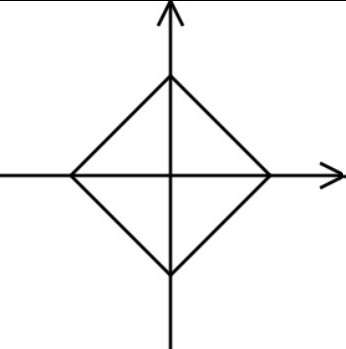

W przestrzeni $(\mathbb{R}^n, \|\cdot \|_2)$ sfera jednostkowa jest postaci

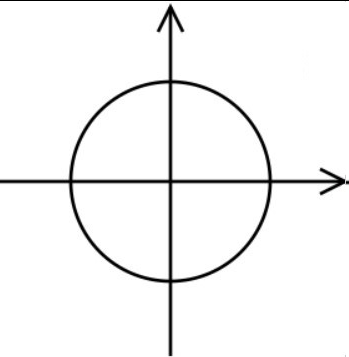

W przestrzeni $(\mathbb{R}^n, \|\cdot \|_{\infty})$ sfera jednostkowa jest postaci

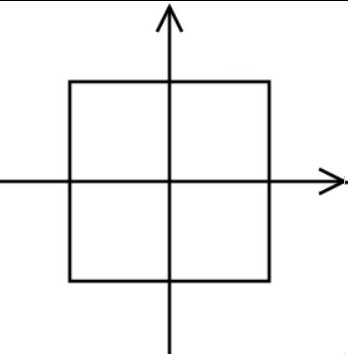

Przejdźmy teraz do następnego zadania. Zauważmy, że chcąc sprawdzić, czy otrzymane rozwiązanie $\widetilde{x}$ układu równań $Ax=b$ jest bliskie dokładnemu rozwiązaniu $x$ należy policzyć normę wektora reszt $r$ (residuum), czyli  $\|r\|=\|A\widetilde{x}-b\|.$ 

##### **Zadanie 5** (2 pkt.)

Napisz funkcję `norm_res()`, która dla zadanej macierzy rzeczywistej $A$ stopnia $n$ i wektora rozwiązań $x$ wygeneruje prawą stronę układu równań $b.$ Następnie oblicz normę euklidesową wektora residualego, przyjmując jako rozwiązanie wektor $y$  będący zaburzonym wektorem $x$. Zaburzenie wykonaj następująco: dla zadanego $\alpha\in(0,0.1)$ elementy wektora $y$ mają być obliczane według wzoru

$$y_i = x_i + (-1)^i\Big (\frac{\alpha x_i}{\log_2(i+1)}\Big )$$ 

dla $i=1, 2, \dots, n$.

Danymi wejściowymi mają być:

1. macierz $A$,
2. wektor rozwiązań $x$,
3. norma, w której zostanie obliczony wektor residualny; podana jako wartość liczbowa:
  * `1` - pierwsza,
  * `2` - euklidesowa,
  * `3` - maksimum.
4. $\alpha$.

Jako wynik mają być zwrócone:

1. wektor $y$,
2. norma wektora residualnego $Ay-b$.

In [58]:
import numpy as np
import numpy.linalg as la
import math

def norm_res(A, x, norm_kind, alpha):
    
    # UMIEŚĆ SWÓJ KOD TUTAJ
    b = np.dot(A, x)
    y = np.zeros_like(x, dtype=float)
    for i in range(len(x)):
        c = ((-1)**(i+1)) * (alpha * x[i] / math.log2(i + 2))
        y[i] = x[i] + c

    r = A @ y - b
    if norm_kind == 1:
        norma = np.sum(np.abs(r))
    elif norm_kind == 2:
        norma = la.norm(r)
    elif norm_kind == 3:
        norma = np.max(np.abs(r))
    else:
        print("Niepoprawny typ normy. Wybierz 1, 2 lub 3.")
        exit(-1)
    return y, norma

A = np.array([[1, 1, 1, 1], [2, 3, 3, -2], [-1, 1, -1, 1], [0, 0, 0, 1]])
x = np.array([1, 1, 1, 1])
norm_kind = 2
alpha = 0.09

y, rn = norm_res(A, x, norm_kind, alpha)
print(y)
print(rn)

[0.91       1.05678368 0.955      1.03876089]
0.32491502950116685


W poniższych przypadkach testowych wystarczy, że wyniki będą zgodne do co najmniej czwartego miejsca dziesiętnego.

Przypadek testowy 1:

```python
A = np.array([[1, 1, 1, 1], [2, 3, 3, -2], [-1, 1, -1, 1], [0, 0, 0, 1]])
x = np.array([1, 1, 1, 1])
norm_kind = 2
alpha = 0.09

y, rn = norm_res(A, x, norm_kind, alpha)
print(y)
print(rn)
```

Oczekiwany wynik:

```plaintext
[0.91       1.05678368 0.955      1.03876089]
0.32491502950116685
```

Przypadek testowy 2:

```python
A = np.array([[1, 1, 1, 1], [2, 3, 3, -2], [-1, 1, -1, 1], [0, 0, 0, 1]])
x = np.array([1, 1, 1, 1])
norm_kind = 2
alpha = 0.02

y, rn = norm_res(A, x, norm_kind, alpha)
print(y)
print(rn)
```

Oczekiwany wynik:

```plaintext
[0.98       1.0126186  0.99       1.00861353]
0.07220333988914822
```

Przypadek testowy 3:

```python
A = np.array([[1, 1, 1, 1], [2, 3, 3, -2], [-1, 1, -1, 1], [0, 0, 0, 1]])
x = np.array([-1, 1, -1, 1])
norm_kind = 2
alpha = 0.09

y, rn = norm_res(A, x, norm_kind, alpha)
print(y)
print(rn)
```

Oczekiwany wynik:

```plaintext
[-0.91        1.05678368 -0.955       1.03876089]
0.4717357684018764
```

Przypadek testowy 4:

```python
A = np.array([[1, 1, 1, 1], [2, 3, 3, -2], [-1, 1, -1, 1], [0, 0, 0, 1]])
x = np.array([-1, 1, -1, 1])
norm_kind = 1
alpha = 0.09

y, rn = norm_res(A, x, norm_kind, alpha)
print(y)
print(rn)
```

Ooczekiwany wynik:

```plaintext
[-0.91        1.05678368 -0.955       1.03876089]
0.7165901432376884
```

Przypadek testowy 5:

```python
A = np.array([[1, 1, 1, 1], [2, 3, 3, -2], [-1, 1, -1, 1], [0, 0, 0, 1]])
x = np.array([-1, 1, -1, 1])
norm_kind = 3 # max
alpha = 0.09

y, rn = norm_res(A, x, norm_kind, alpha)
print(y)
print(rn)
```

Oczekiwany wynik:

```plaintext
[-0.91        1.05678368 -0.955       1.03876089]
0.4078292530110832
```

----

Literatura:

1. Klein P.N., *Coding the matrix: linear algebra through the computer science applications*, Newtonian Press (2013).